In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Data Preprocessing

In [2]:
mydf=pd.read_csv(r"C:\Users\I544708\Desktop\PSA\Total.csv")

In [4]:
print(len(mydf))

9502177


In [8]:
temp_df1=mydf.loc[(mydf["DERIVED_CNTR_PURP_C"]=="TSHIP"),["SERVICE_C1"] ]

In [9]:
print(temp_df1.head())

  SERVICE_C1
0      S7569
1      S7389
2      S7388
3      S7439
4      S7639


In [16]:
temp_df2=mydf.loc[(mydf["DERIVED_CNTR_PURP_C"]=="TSHIP") & (((mydf["SERVICE_C1"]=="S7569") & (mydf["SERVICE_C2"]=="S7338")) | ((mydf["SERVICE_C2"]=="S7569")&(mydf["SERVICE_C1"]=="S7338")))]

In [17]:
#temp_df3=temp_df2.
temp_df2.to_excel("temp1.xlsx")

In [18]:
time_df=pd.to_datetime(mydf["ATD1"])

In [19]:
print(type(time_df.loc[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [20]:
date_df=time_df.dt.date

In [24]:
print(len(date_df))

9502177


In [25]:
useful_df=pd.concat([date_df,mydf[["SUMOFBOX_Q","SUMOFTEU_Q"]]],axis=1)

In [27]:
print(len(useful_df))

9502177


In [55]:
df_byday=useful_df.groupby(by=["ATD1"]).sum()

In [58]:
print(df_byday.head())

            SUMOFBOX_Q  SUMOFTEU_Q       date
ATD1                                         
2017-01-01       45105    68212.75 2017-01-01
2017-01-02       47485    70977.00 2017-01-02
2017-01-03       56628    85278.00 2017-01-03
2017-01-04       62837    97725.00 2017-01-04
2017-01-05       62736    95622.75 2017-01-05


In [57]:
df_byday['date'] = pd.to_datetime(df_byday.index)

In [59]:
df_byweek= df_byday.groupby(pd.Grouper(key='date',freq='W')).sum()

In [60]:
print(df_byweek.head())

            SUMOFBOX_Q  SUMOFTEU_Q
date                              
2017-01-01       45105    68212.75
2017-01-08      388791   591855.25
2017-01-15      395724   602501.00
2017-01-22      381786   576970.00
2017-01-29      384205   578588.50


In [61]:
df_byweek2= df_byday.groupby(pd.Grouper(key='date',freq='7D')).sum()

In [62]:
print(df_byweek2.head())

            SUMOFBOX_Q  SUMOFTEU_Q
date                              
2017-01-01      384866   586742.25
2017-01-08      404495   614891.50
2017-01-15      370285   558921.75
2017-01-22      385892   582864.25
2017-01-29      396321   600673.75


In [66]:
df_byweek2['week'] = pd.to_datetime(df_byweek2.index)

In [84]:
df_byweek2.drop(df_byweek2.index[len(df_byweek2)-1],inplace=True)

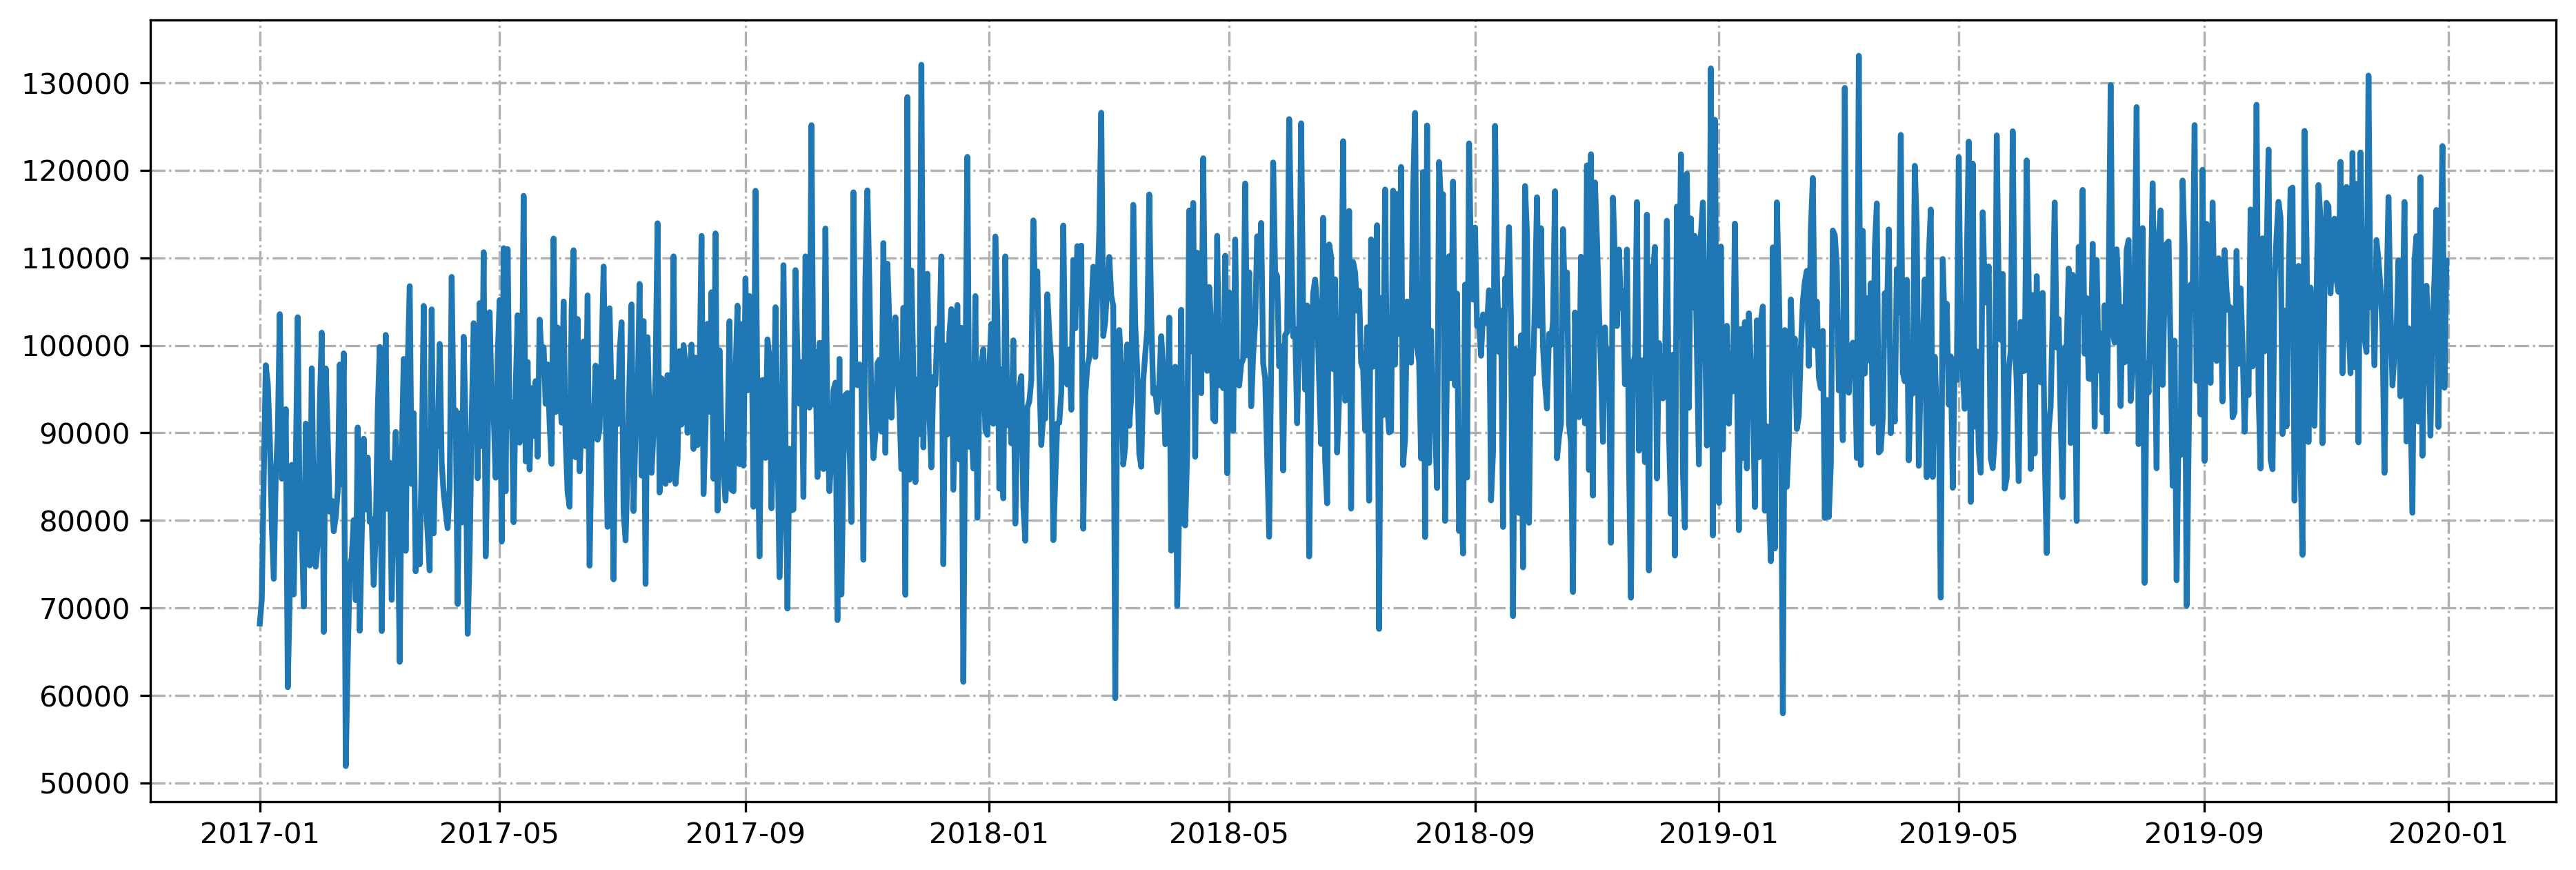

In [65]:
fig, ax = plt.subplots(figsize=(15,5),dpi = 300)
ax.plot(df_byday['date'], df_byday['SUMOFTEU_Q'], linewidth=2.0)
# ax.set_title(bf_name)
#     plt.ylim((0, 450000))
plt.grid(linestyle='-.')
plt.show()

<Figure size 432x288 with 0 Axes>

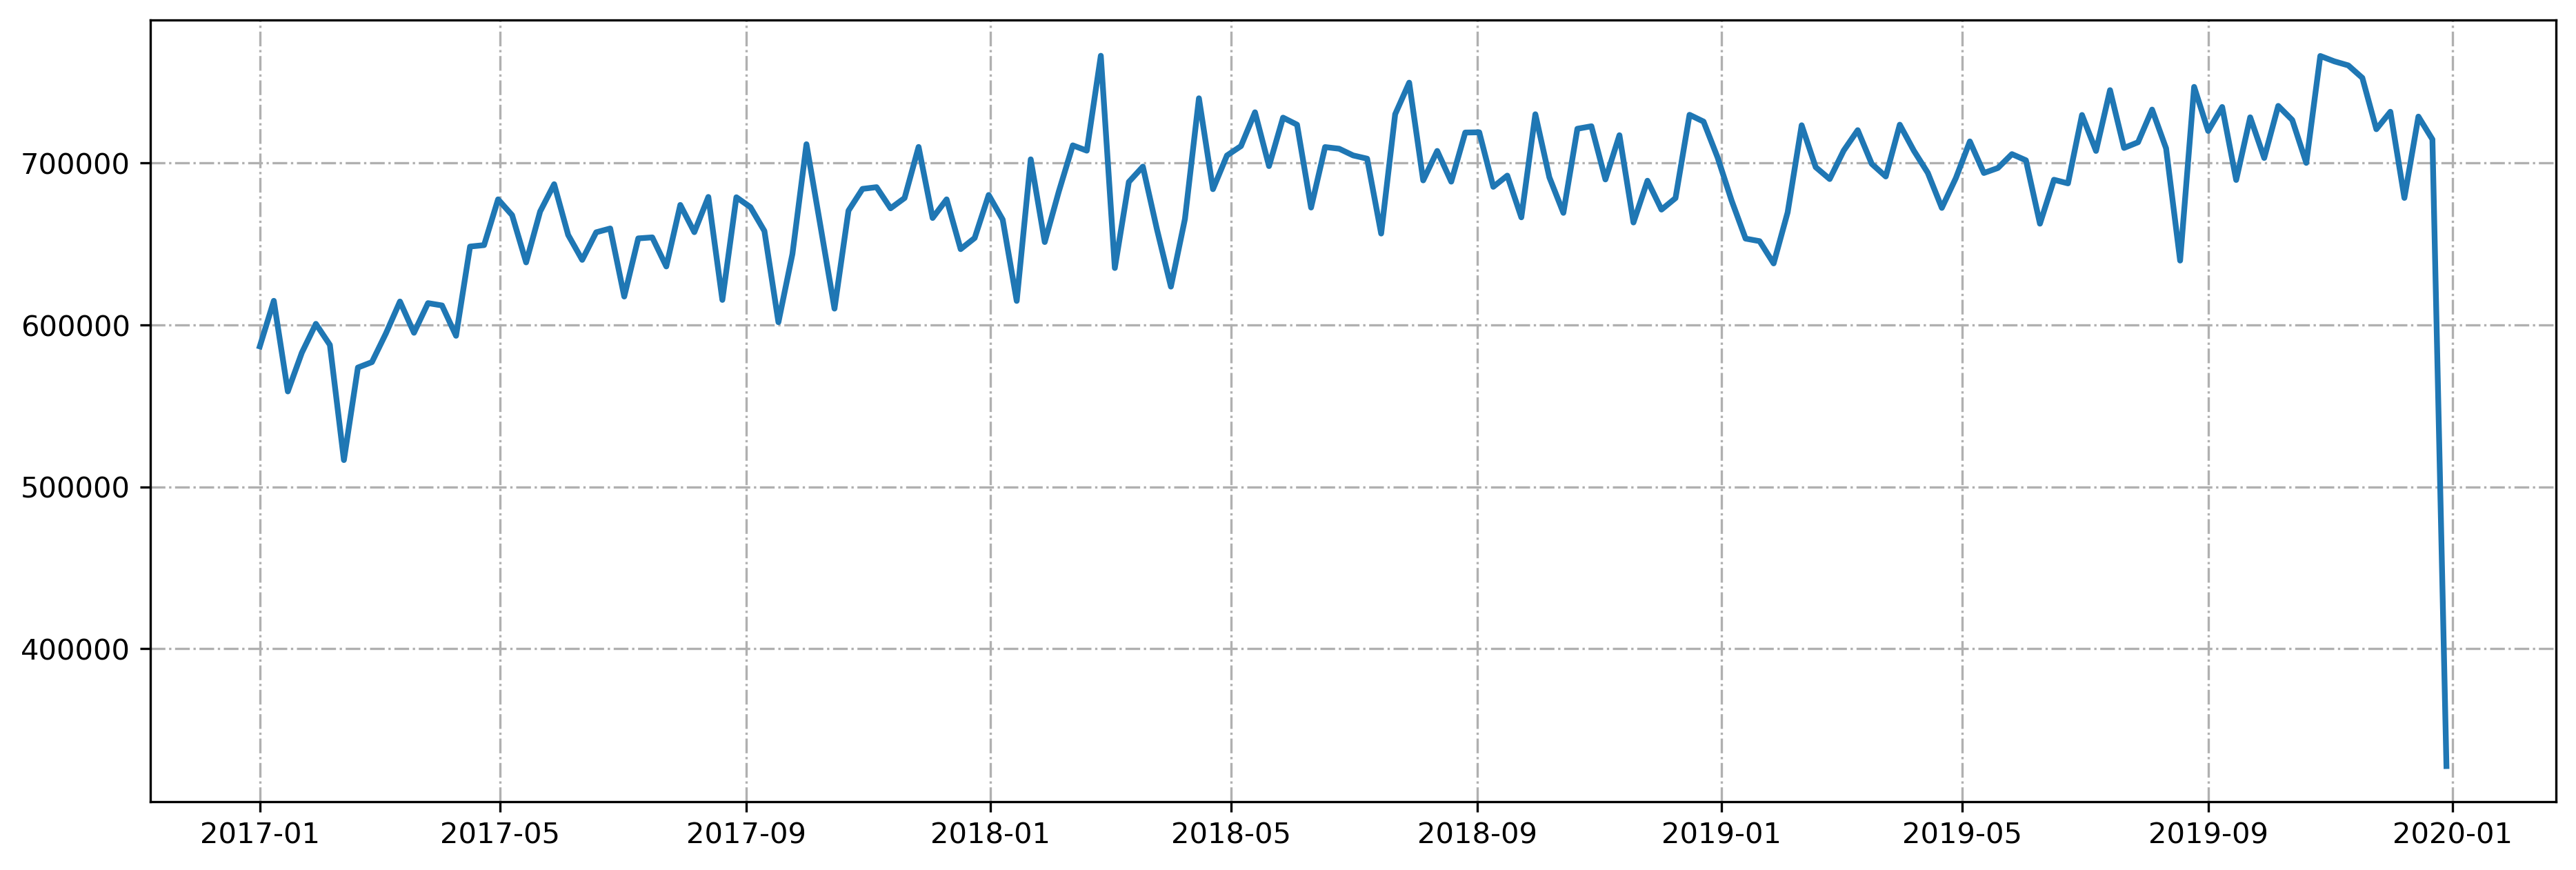

In [67]:
plt.clf()
fig, ax = plt.subplots(figsize=(15,5),dpi = 300)
ax.plot(df_byweek2['week'], df_byweek2['SUMOFTEU_Q'], linewidth=2.0)
# ax.set_title(bf_name)
#     plt.ylim((0, 450000))
plt.grid(linestyle='-.')
plt.show()

In [86]:
print(df_byweek2.tail())

            SUMOFBOX_Q  SUMOFTEU_Q       week
date                                         
2019-11-24      462846   720852.00 2019-11-24
2019-12-01      469317   731638.00 2019-12-01
2019-12-08      437725   678421.50 2019-12-08
2019-12-15      460620   728646.75 2019-12-15
2019-12-22      454895   714568.25 2019-12-22


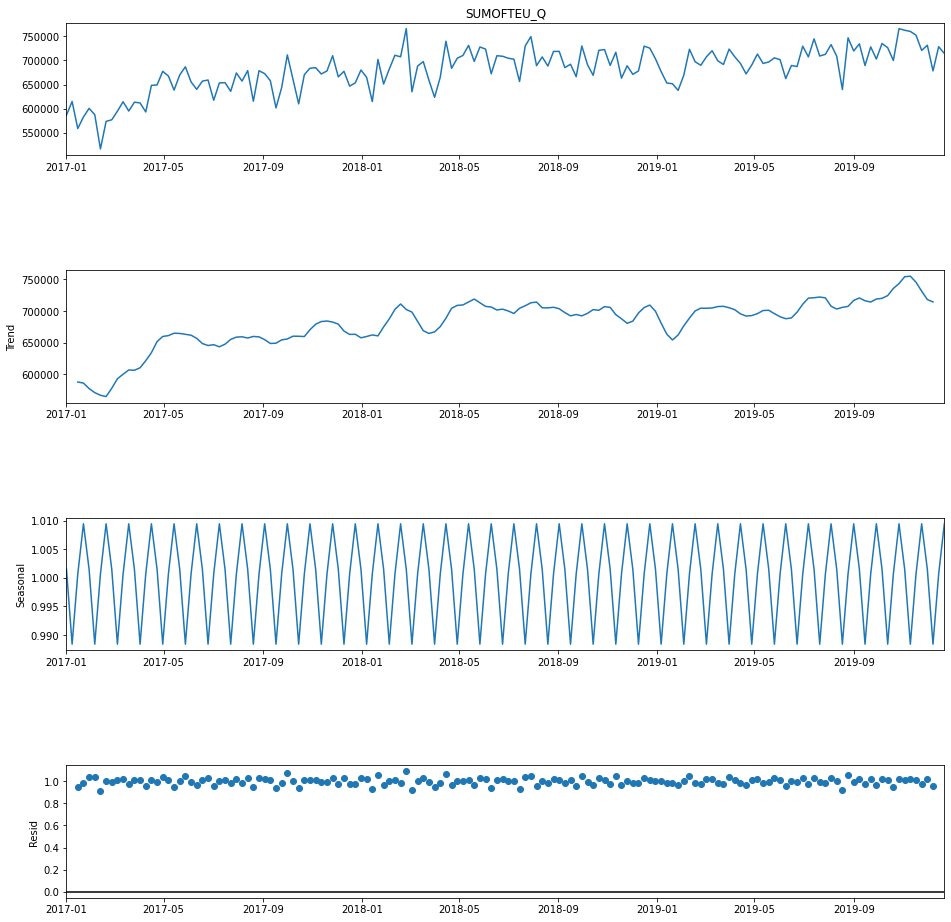

In [333]:
# time series decomposition

from statsmodels.tsa.seasonal import seasonal_decompose

temp_series = df_byweek2['SUMOFTEU_Q']
result = seasonal_decompose(temp_series, model='multiplicative',period=4)
fig=result.plot()
fig.set_size_inches(15,15)
#plt.fig(figsize=(300,300))
plt.show()

In [103]:
df_byday["year"]=df_byday['date'].dt.year
print(df_byday.head())

            SUMOFBOX_Q  SUMOFTEU_Q       date  year
ATD1                                               
2017-01-01       45105    68212.75 2017-01-01  2017
2017-01-02       47485    70977.00 2017-01-02  2017
2017-01-03       56628    85278.00 2017-01-03  2017
2017-01-04       62837    97725.00 2017-01-04  2017
2017-01-05       62736    95622.75 2017-01-05  2017


In [105]:
count = df_byday.isna().sum()
print(count)

SUMOFBOX_Q    0
SUMOFTEU_Q    0
date          0
year          0
dtype: int64


In [108]:
# reshape a temp dataframe to check number of outliers


temp1=df_byday.loc[(df_byday["year"]==2017),["SUMOFTEU_Q"]]
temp2=df_byday.loc[(df_byday["year"]==2018),["SUMOFTEU_Q"]]
temp3=df_byday.loc[(df_byday["year"]==2019),["SUMOFTEU_Q"]]
temp1.reset_index(drop=True, inplace=True)
temp2.reset_index(drop=True, inplace=True)
temp3.reset_index(drop=True, inplace=True)

TEMP=pd.concat([temp1,temp2,temp3],axis=1)

In [110]:
print(TEMP.isna().sum())

SUMOFTEU_Q    0
SUMOFTEU_Q    0
SUMOFTEU_Q    0
dtype: int64


In [111]:
Q1 = TEMP.quantile(0.25)
Q3 = TEMP.quantile(0.75)
IQR = Q3 - Q1

In [112]:
print(((TEMP < (Q1 - 1.5 * IQR)) | (TEMP > (Q3 + 1.5 * IQR))).sum())

SUMOFTEU_Q    4
SUMOFTEU_Q    1
SUMOFTEU_Q    1
dtype: int64


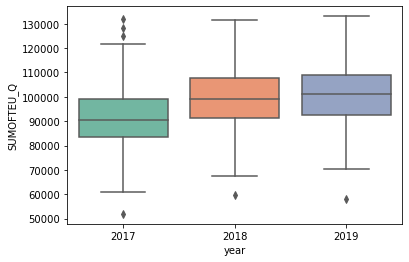

In [104]:
# check out the effectiveness of outlier removal
import seaborn as sns
import matplotlib.pyplot as plt

plt.clf()
ax = sns.boxplot(x="year", y="SUMOFTEU_Q",data=df_byday, palette="Set2")
plt.show()

In [ ]:
要不要考虑用后半段的时间序列

In [350]:
using_df=df_byweek2[["SUMOFTEU_Q"]]
string="SUMOFTEU_Q"
STRING="TEU_Q"

In [351]:
# normalisation
from sklearn.preprocessing import MinMaxScaler
def minmaxscaler(data: pd.DataFrame) -> pd.DataFrame:
    
    STRING = data[string].values
    STRING = STRING.reshape(len(STRING), 1)
    STRING = scaler.fit_transform(STRING)
    STRING = STRING.reshape(len(STRING),)    
    data[string] = STRING
        
    return data

In [352]:
scaler = MinMaxScaler(feature_range=(0, 1))
use_df_scal = minmaxscaler(using_df)

<ipython-input-351-ab13074855e9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[string] = STRING


In [353]:
print(use_df_scal)

            SUMOFTEU_Q
date                  
2017-01-01    0.281181
2017-01-08    0.393925
2017-01-15    0.169754
2017-01-22    0.265649
2017-01-29    0.336980
...                ...
2019-11-24    0.818322
2019-12-01    0.861522
2019-12-08    0.648378
2019-12-15    0.849542
2019-12-22    0.793154

[156 rows x 1 columns]


In [443]:
n_in = 48 # 12个月
n_out = 8 # 2个月
n_features = 1
n_val = 1

In [355]:
# split X and Y

def build_train(train, n_in, n_out):
    
    train.reset_index(drop=True, inplace=True)
    #train = train.drop(["date"], axis=1)
    X_train, Y_train = [], []
    for i in range(train.shape[0]-n_in-n_out+1):
        X_train.append(np.array(train.iloc[i:i+n_in]))
        Y_train.append(np.array(train.iloc[i+n_in:i+n_in+n_out][string]))
        
    return np.array(X_train), np.array(Y_train)

In [444]:
df_cpy = use_df_scal.copy()
X, y = build_train(df_cpy, n_in, n_out)

In [357]:
print(len(X_train))

144


In [358]:
# train and test

def split_data(x, y, n_val: int):
    
    x_train = x[:-n_val]
    x_val = x[-n_val:]
    y_train = y[:-n_val]
    y_val = y[-n_val:]
    
    return x_train, y_train, x_val, y_val

In [445]:
X_train, y_train, X_val, y_val = split_data(X, y, n_val)

In [394]:
print(len(X_val))

1


In [361]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM, TimeDistributed, RepeatVector
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam

In [ ]:
seed = 7
np.random.seed(seed)

In [547]:
# LSTM
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

def build_lstm(n_in: int, n_features: int):
    
    model = Sequential()
    model.add(LSTM(128, activation='relu', input_shape=(n_in, n_features),return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(128,return_sequences=False))
    model.add(Dense(n_out))
    opt = Adam(learning_rate=0.001)
    model.compile(optimizer=opt, loss='mae')
    monitor=EarlyStopping(monitor='val_loss',min_delta=1e-3,patience=200,verbose=1,restore_best_weights=True)
    
    return model,monitor

In [548]:
# fit
def model_fit(x_train, y_train, x_val, y_val, n_features):
    
    model,monitor = build_lstm(
        n_in   = n_in,
        n_features= 1
    )
    #model.compile(loss='mae', optimizer='adam')
    model.fit(x_train, y_train, epochs=n_epochs, batch_size=10, verbose=1,  validation_data=(x_val, y_val),callbacks=[monitor])
    m = model.evaluate(x_val, y_val)
    print(m)
    
    return model

In [541]:
n_epochs = 500

In [553]:
model = build_lstm(n_in, 1)
model = model_fit(X_train, y_train, X_val, y_val, 1)
predict = model.predict(X_val)  

Epoch 1/500
10/10 [==============================] - 4s 133ms/step - loss: 0.5966 - val_loss: 0.1485
Epoch 2/500
10/10 [==============================] - 1s 69ms/step - loss: 0.1425 - val_loss: 0.1057
Epoch 3/500
10/10 [==============================] - 1s 80ms/step - loss: 0.1217 - val_loss: 0.1009
Epoch 4/500
10/10 [==============================] - 1s 77ms/step - loss: 0.1001 - val_loss: 0.0869
Epoch 5/500
10/10 [==============================] - 1s 92ms/step - loss: 0.1004 - val_loss: 0.1031
Epoch 6/500
10/10 [==============================] - 1s 74ms/step - loss: 0.1039 - val_loss: 0.1250
Epoch 7/500
10/10 [==============================] - 1s 80ms/step - loss: 0.0952 - val_loss: 0.1212
Epoch 8/500
10/10 [==============================] - 1s 70ms/step - loss: 0.0967 - val_loss: 0.1051
Epoch 9/500
10/10 [==============================] - 1s 106ms/step - loss: 0.0955 - val_loss: 0.1010
Epoch 10/500
10/10 [==============================] - 1s 76ms/step - loss: 0.1003 - val_loss: 0.09

10/10 [==============================] - 1s 82ms/step - loss: 0.0962 - val_loss: 0.1141
Epoch 83/500
10/10 [==============================] - 1s 84ms/step - loss: 0.0908 - val_loss: 0.1188
Epoch 84/500
10/10 [==============================] - 1s 98ms/step - loss: 0.0930 - val_loss: 0.1039
Epoch 85/500
10/10 [==============================] - 1s 99ms/step - loss: 0.0976 - val_loss: 0.1191
Epoch 86/500
10/10 [==============================] - 1s 81ms/step - loss: 0.0974 - val_loss: 0.1073
Epoch 87/500
10/10 [==============================] - 1s 80ms/step - loss: 0.0920 - val_loss: 0.0995
Epoch 88/500
10/10 [==============================] - 1s 85ms/step - loss: 0.0912 - val_loss: 0.1085
Epoch 89/500
10/10 [==============================] - 1s 95ms/step - loss: 0.0956 - val_loss: 0.0991
Epoch 90/500
10/10 [==============================] - 1s 81ms/step - loss: 0.0952 - val_loss: 0.1485
Epoch 91/500
10/10 [==============================] - 1s 88ms/step - loss: 0.0992 - val_loss: 0.1194
Epo

10/10 [==============================] - 1s 71ms/step - loss: 0.0905 - val_loss: 0.1043
Epoch 163/500
10/10 [==============================] - 1s 68ms/step - loss: 0.0913 - val_loss: 0.1229
Epoch 164/500
10/10 [==============================] - 1s 73ms/step - loss: 0.0928 - val_loss: 0.1122
Epoch 165/500
10/10 [==============================] - 1s 70ms/step - loss: 0.0934 - val_loss: 0.1338
Epoch 166/500
10/10 [==============================] - 1s 95ms/step - loss: 0.0946 - val_loss: 0.1221
Epoch 167/500
10/10 [==============================] - 1s 81ms/step - loss: 0.0917 - val_loss: 0.0973
Epoch 168/500
10/10 [==============================] - 1s 87ms/step - loss: 0.0904 - val_loss: 0.1163
Epoch 169/500
10/10 [==============================] - 1s 85ms/step - loss: 0.0967 - val_loss: 0.1259
Epoch 170/500
10/10 [==============================] - 1s 76ms/step - loss: 0.0887 - val_loss: 0.0904
Epoch 171/500
10/10 [==============================] - 1s 73ms/step - loss: 0.0931 - val_loss: 0

10/10 [==============================] - 1s 74ms/step - loss: 0.0870 - val_loss: 0.1046
Epoch 243/500
10/10 [==============================] - 1s 88ms/step - loss: 0.0891 - val_loss: 0.1046
Epoch 244/500
10/10 [==============================] - 1s 75ms/step - loss: 0.0858 - val_loss: 0.0917
Epoch 245/500
10/10 [==============================] - 1s 82ms/step - loss: 0.0847 - val_loss: 0.1009
Epoch 246/500
10/10 [==============================] - 1s 102ms/step - loss: 0.0861 - val_loss: 0.1233
Epoch 247/500
10/10 [==============================] - 1s 79ms/step - loss: 0.0896 - val_loss: 0.0943
Epoch 248/500
10/10 [==============================] - 1s 98ms/step - loss: 0.0881 - val_loss: 0.1022
Epoch 249/500
10/10 [==============================] - 1s 79ms/step - loss: 0.0876 - val_loss: 0.0989
Epoch 250/500
10/10 [==============================] - 1s 82ms/step - loss: 0.0854 - val_loss: 0.0833
Epoch 251/500
10/10 [==============================] - 1s 79ms/step - loss: 0.0962 - val_loss: 

10/10 [==============================] - 1s 66ms/step - loss: 0.0812 - val_loss: 0.0949
Epoch 323/500
10/10 [==============================] - 1s 93ms/step - loss: 0.0824 - val_loss: 0.0815
Epoch 324/500
10/10 [==============================] - 1s 95ms/step - loss: 0.0815 - val_loss: 0.0846
Epoch 325/500
10/10 [==============================] - 1s 104ms/step - loss: 0.0836 - val_loss: 0.0802
Epoch 326/500
10/10 [==============================] - 1s 91ms/step - loss: 0.0781 - val_loss: 0.0895
Epoch 327/500
10/10 [==============================] - 1s 87ms/step - loss: 0.0853 - val_loss: 0.0807
Epoch 328/500
10/10 [==============================] - 1s 81ms/step - loss: 0.0830 - val_loss: 0.0929
Epoch 329/500
10/10 [==============================] - 1s 75ms/step - loss: 0.0810 - val_loss: 0.0837
Epoch 330/500
10/10 [==============================] - 1s 94ms/step - loss: 0.0844 - val_loss: 0.0698
Epoch 331/500
10/10 [==============================] - 1s 71ms/step - loss: 0.0788 - val_loss: 

10/10 [==============================] - 1s 80ms/step - loss: 0.0767 - val_loss: 0.0819
Epoch 403/500
10/10 [==============================] - 1s 82ms/step - loss: 0.0770 - val_loss: 0.0814
Epoch 404/500
10/10 [==============================] - 1s 69ms/step - loss: 0.0785 - val_loss: 0.0811
Epoch 405/500
10/10 [==============================] - 1s 70ms/step - loss: 0.0764 - val_loss: 0.0813
Epoch 406/500
10/10 [==============================] - 1s 80ms/step - loss: 0.0782 - val_loss: 0.0845
Epoch 407/500
10/10 [==============================] - 1s 77ms/step - loss: 0.0779 - val_loss: 0.0751
Epoch 408/500
10/10 [==============================] - 1s 69ms/step - loss: 0.0789 - val_loss: 0.0850
Epoch 409/500
10/10 [==============================] - 1s 84ms/step - loss: 0.0760 - val_loss: 0.0920
Epoch 410/500
10/10 [==============================] - 1s 67ms/step - loss: 0.0774 - val_loss: 0.0764
Epoch 411/500
10/10 [==============================] - 1s 76ms/step - loss: 0.0778 - val_loss: 0

10/10 [==============================] - 1s 108ms/step - loss: 0.0747 - val_loss: 0.0853
Epoch 483/500
10/10 [==============================] - 1s 74ms/step - loss: 0.0753 - val_loss: 0.0837
Epoch 484/500
10/10 [==============================] - 1s 78ms/step - loss: 0.0735 - val_loss: 0.0792
Epoch 485/500
10/10 [==============================] - 1s 82ms/step - loss: 0.0742 - val_loss: 0.0805
Epoch 486/500
10/10 [==============================] - 1s 106ms/step - loss: 0.0740 - val_loss: 0.0793
Epoch 487/500
10/10 [==============================] - 1s 77ms/step - loss: 0.0723 - val_loss: 0.0842
Epoch 488/500
10/10 [==============================] - 1s 69ms/step - loss: 0.0756 - val_loss: 0.0792
Epoch 489/500
10/10 [==============================] - 1s 79ms/step - loss: 0.0757 - val_loss: 0.0738
Epoch 490/500
10/10 [==============================] - 1s 85ms/step - loss: 0.0736 - val_loss: 0.0733
Epoch 491/500
10/10 [==============================] - 1s 81ms/step - loss: 0.0732 - val_loss:

In [474]:
# LSTM - with grid search on activation function
def create_model(activation):
    
    model = Sequential()
    model.add(LSTM(128, activation=activation, input_shape=(48,1)))
    model.add(Dropout(0.3))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    
    return model

In [475]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

# create model
model = KerasRegressor(build_fn=create_model, epochs=100, batch_size=20, verbose=0)
# define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.014199 using {'activation': 'relu'}
-0.016240 (0.008979) with: {'activation': 'softmax'}
-0.016980 (0.010434) with: {'activation': 'softplus'}
-0.017290 (0.007808) with: {'activation': 'softsign'}
-0.014199 (0.006056) with: {'activation': 'relu'}
-0.014962 (0.005642) with: {'activation': 'tanh'}
-0.016223 (0.008505) with: {'activation': 'sigmoid'}
-0.016882 (0.010651) with: {'activation': 'hard_sigmoid'}
-0.015034 (0.004848) with: {'activation': 'linear'}


In [476]:
grid_result.best_params_

{'activation': 'relu'}

In [502]:
# LSTM - with grid search on optimiser
def create_model(optimizer='adam'):
    
    model = Sequential()
    model.add(LSTM(128, activation='relu', input_shape=(n_in, n_features),return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(128,return_sequences=False))
    model.add(Dense(n_out))
    model.compile(optimizer=optimizer, loss='mae')
    
    return model

In [503]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

# create model
model = KerasRegressor(build_fn=create_model, epochs=250, batch_size=20, verbose=0)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.098180 using {'optimizer': 'Adagrad'}
-0.098748 (0.027421) with: {'optimizer': 'SGD'}
-0.119089 (0.036303) with: {'optimizer': 'RMSprop'}
-0.098180 (0.025768) with: {'optimizer': 'Adagrad'}
-0.679376 (0.062789) with: {'optimizer': 'Adadelta'}
-0.111009 (0.022847) with: {'optimizer': 'Adam'}
-0.100895 (0.023662) with: {'optimizer': 'Adamax'}
-0.105571 (0.029336) with: {'optimizer': 'Nadam'}


In [554]:
validation = scaler.inverse_transform(predict.reshape(-1,1))
print(validation)

[[730586.25]
 [738327.3 ]
 [745093.9 ]
 [734886.4 ]
 [729221.75]
 [726862.6 ]
 [721857.94]
 [710089.4 ]]


In [462]:
actual = scaler.inverse_transform(y_val)
print(actual)

[[762766.75 760251.5  752565.75 720852.   731638.   678421.5  728646.75
  714568.25]]


In [187]:
temp22=actual.reshape(-1)
print(temp22)

[119219.5   87379.   101857.75 106812.25 100583.75  89677.5  101806.75
 107601.75 115472.25  90678.   108748.25 122769.25  95158.5  109666.75]


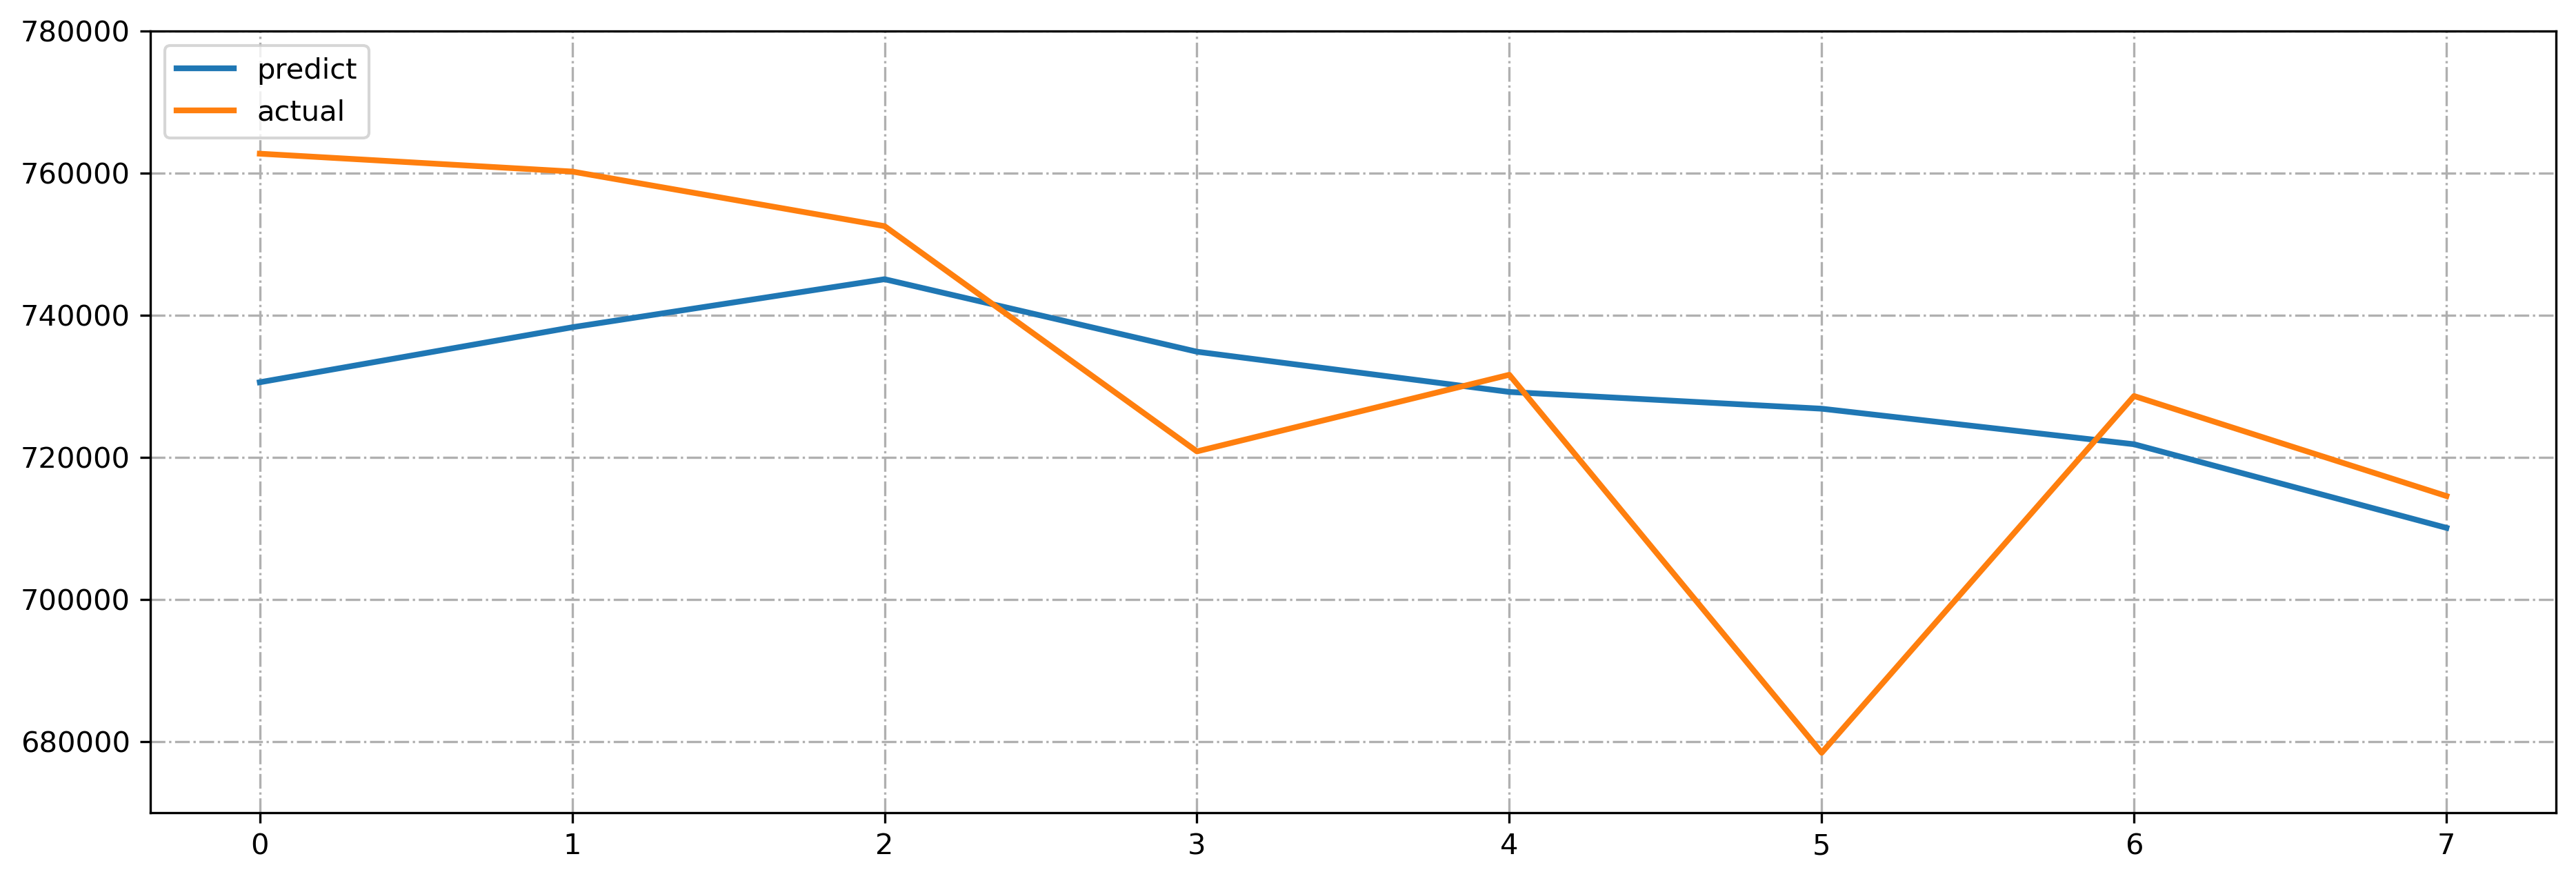

In [555]:
predict = validation.reshape(-1)
actual = actual.reshape(-1)
x = [x for x in range(8)]
fig, ax = plt.subplots(figsize=(15,5),dpi = 300)
ax.plot(x, predict, linewidth=2.0,label = "predict")
ax.plot(x, actual, linewidth=2.0,label = "actual")
ax.legend(loc=2);
# ax.set_title(bf_name)
plt.ylim((670000,780000))
plt.grid(linestyle='-.')
plt.show()